Importing The Dependecies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [3]:
dataset = pd.read_csv("./data/car data.csv")

In [4]:
# printing The First rows of Dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# Describing The Dataset
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# Number of Rows and columns
dataset.shape

(301, 9)

In [10]:
# Checking For Null Values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
# Checking For the Distribution of Categorical data
print("For The Fuel Type :",dataset.Fuel_Type.value_counts())
print("For The Seller_Type:",dataset.Seller_Type.value_counts())
print("For The Transmission:",dataset.Transmission.value_counts())


For The Fule Type : Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
For The Seller_Type: Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
For The Transmission: Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [28]:
# Data Encoding
dataset.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
dataset.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
dataset.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)


In [29]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting The Data into Training Data and Testing Data

In [35]:
X = dataset.drop(columns=["Selling_Price","Car_Name"],axis=1)
Y = dataset["Selling_Price"]

In [36]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [37]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [38]:
# Splitting The Test and train data
X_train,X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training
--- 
1. Linear Regressing 

In [39]:
LR_model = LinearRegression()

In [40]:
LR_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [42]:
Training_Data_Prediction = LR_model.predict(X_train)


In [44]:
# R squared Error
errorScore = metrics.r2_score(Y_train,Training_Data_Prediction)
print("R Squared Error",errorScore)

R Squared Error 0.8799451660493699


Text(0, 0.5, 'Predicted Prices')

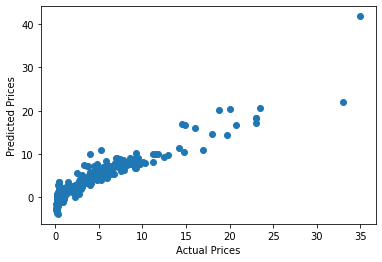

In [45]:
# Visualisation
plt.scatter(Y_train,Training_Data_Prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

In [46]:
Test_Data_Prediciton = LR_model.predict(X_test)

In [47]:
ErrorScore_TestData = metrics.r2_score(Y_test,Test_Data_Prediciton)
print(ErrorScore_TestData)

0.8365766715026473


2. Lasso Rigressing

In [48]:
L_model = Lasso()

In [49]:
L_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [50]:
Training_Data_Prediction = L_model.predict(X_train)


In [51]:
# R squared Error
errorScore = metrics.r2_score(Y_train,Training_Data_Prediction)
print("R Squared Error",errorScore)

R Squared Error 0.8427856123435795


Text(0, 0.5, 'Predicted Prices')

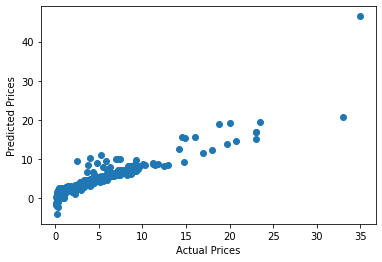

In [52]:
# Visualisation
plt.scatter(Y_train,Training_Data_Prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

In [53]:
Test_Data_Prediciton = L_model.predict(X_test)

In [54]:
ErrorScore_TestData = metrics.r2_score(Y_test,Test_Data_Prediciton)
print(ErrorScore_TestData)

0.8709167941173201
